In [1]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ark20uni
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ark20uni
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=5c342102815c063e60df8b1ada5cec886087f30633ec729e4c56c627249121cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-skjxf711/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [2]:
!pip install keras==2.2.4
!pip install tensorflow==1.6 
## CRF 사용시 keras version은 2.2.4를 사용하여야함
## keras 2.2.4를 사용시 tensorflow 2.2 대 버젼은 사용이 불가능
## get_default_graph 함수가 2.2 대 버전에서 tf.compat.v1으로 설정되어 있기 때문에 함수 사용불가
## 1.3, 1.4.1 둘다 while_loop에서 max_iteration 에러가 생김
## 따라서 keras==2.2.4, tensorflow==1.6을 사용함

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarn

In [0]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [5]:
data[:5]

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [6]:
print('데이터 프레임 행의 개수 : {}'.format(len(data)))

데이터 프레임 행의 개수 : 1048575


In [7]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : True


In [8]:
print('어떤 열에 Null 값이 있는지 출력')
print('================================')
data.isnull().sum()

어떤 열에 Null 값이 있는지 출력


Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [9]:
print('sentence # 열의 중복을 제거한 값의 개수 : {}'.format(data['Sentence #'].nunique()))
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))
print('Tag 열의 중복을 제거한 값의 개수 : {}'.format(data.Tag.nunique()))

sentence # 열의 중복을 제거한 값의 개수 : 47959
Word 열의 중복을 제거한 값의 개수 : 35178
Tag 열의 중복을 제거한 값의 개수 : 17


In [10]:
print('Tag 열의 각각의 값의 개수 카운트')
print("==================================")
data.groupby('Tag').size().reset_index(name='count')

Tag 열의 각각의 값의 개수 카운트


,Tag,count
0,B-art,402
1,B-eve,308
2,B-geo,37644
3,B-gpe,15870
4,B-nat,201
5,B-org,20143
6,B-per,16990
7,B-tim,20333
8,I-art,297
9,I-eve,253


In [0]:
data = data.fillna(method='ffill')

In [12]:
data.tail()

,Sentence #,Word,POS,Tag
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O
1048574,Sentence: 47959,attack,NN,O


In [13]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [14]:
print('데이터에 Null 값이 있는지 유무 : ' + str(data.isnull().values.any()))

데이터에 Null 값이 있는지 유무 : False


In [15]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 31817


In [16]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [17]:
func = lambda x: [(w,t) for w, t in zip(x['Word'].values.tolist(),x['Tag'].values.tolist())]
tagged_sentences = [i for i in data.groupby('Sentence #').apply(func)]
print('전체 샘플 개수 : {}'.format(len(tagged_sentences)))

전체 샘플 개수 : 47959


In [18]:
print(tagged_sentences[0])

[('thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('london', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('british', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [0]:
sentences, ner_tags = [], []

for tagged_sentence in tagged_sentences:
  sentence, tag_info = zip(*tagged_sentence)
  sentences.append(list(sentence))
  ner_tags.append(list(tag_info))

In [20]:
print(sentences[0])
print(ner_tags[0])

['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [21]:
print(sentences[98])
print(ner_tags[98])

['she', 'had', 'once', 'received', 'a', 'kidney', 'transplant', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


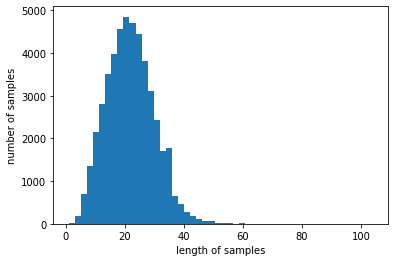

In [22]:
print('샘플의 최대 길이 : %d' % max(len(i) for i in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [0]:
src_tokenizer = Tokenizer(oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False)
tar_tokenizer.fit_on_texts(ner_tags)

In [24]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print("단어 집합의 크기 : {}".format(vocab_size))
print("개체명 태깅 정보 집합의 크기 : {}".format(tag_size))

단어 집합의 크기 : 31819
개체명 태깅 정보 집합의 크기 : 18


In [25]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [0]:
x_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [27]:
print(x_train[0])
print(y_train[0])

[254, 6, 967, 16, 1795, 238, 468, 7, 523, 2, 129, 5, 61, 9, 571, 2, 833, 6, 186, 90, 22, 15, 56, 3]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1]


In [28]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [29]:
decoded = []
for i in x_train[0]:
  decoded.append(index_to_word[i])

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩된 문장 : {}'.format(decoded))

기존의 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']
디코딩된 문장 : ['thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'london', 'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'british', 'troops', 'from', 'that', 'country', '.']


In [0]:
max_len = 70
x_train = pad_sequences(x_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=.2,random_state=777)

In [0]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [32]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (38367, 70)
훈련 샘플 레이블의 크기 : (38367, 70, 18)
테스트 샘플 문장의 크기 : (9592, 70)
테스트 샘플 레이블의 크기 : (9592, 70, 18)


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Bidirectional, TimeDistributed, Dropout
from keras_contrib.layers import CRF

In [0]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf = CRF(tag_size)
model.add(crf)

In [37]:
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])
hist = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=.1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 34530 samples, validate on 3837 samples
Epoch 1/5
34530/34530 [==============================] - 305s 9ms/step - loss: 8.3814 - crf_viterbi_accuracy: 0.8920 - val_loss: 8.1800 - val_crf_viterbi_accuracy: 0.9293
Epoch 2/5
34530/34530 [==============================] - 309s 9ms/step - loss: 8.1341 - crf_viterbi_accuracy: 0.9463 - val_loss: 8.1116 - val_crf_viterbi_accuracy: 0.9473
Epoch 3/5
34530/34530 [==============================] - 307s 9ms/step - loss: 8.0975 - crf_viterbi_accuracy: 0.9562 - val_loss: 8.0954 - val_crf_viterbi_accuracy: 0.9515
Epoch 4/5
34530/34530 [==============================] - 307s 9ms/step - loss: 8.0824 - crf_viterbi_accuracy: 0.9609 - val_loss: 8.0787 - val_crf_viterbi_accuracy: 0.9573
Epoch 5/5
34530/34530 [==============================] - 317s 9ms/step - loss: 8.0734 - crf_viterbi_accuracy: 0.9638 - val_loss: 8.0780 - val_crf_viterbi_accuracy: 0.9544


In [38]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

9592/9592 [==============================] - 35s 4ms/step

 테스트 정확도: 0.9547


In [40]:
i=13
y_predicted = model.predict(np.array([x_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1)
true = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어","실제값","예측값"))
print(35 *"=")

for w,t, pred in zip(x_test[i],true,y_predicted[0]):
  if w!=0:
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
the              : O       O
statement        : O       O
came             : O       O
as               : O       O
u.n.             : B-org   B-org
secretary-general: I-org   I-org
kofi             : B-per   B-per
annan            : I-per   I-per
met              : O       O
with             : O       O
officials        : O       O
in               : O       O
amman            : B-geo   B-geo
to               : O       O
discuss          : O       O
wednesday        : B-tim   B-tim
's               : O       O
attacks          : O       O
.                : O       O


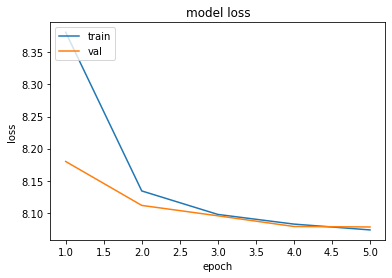

In [44]:
epochs = range(1, len(hist.history['val_loss']) + 1)
plt.plot(epochs, hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
!pip install seqeval

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=69a81331dc98c4c5f58c309d21199df375732a625ae9016c249bc824757872e0
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [0]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [0]:
def sequences_to_tag(sequences):
    result = []
    for sequence in sequences:
        temp = []
        for pred in sequence:
            pred_index = np.argmax(pred)
            temp.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(temp)
    return result

In [0]:
y_predicted = model.predict(x_test)
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

In [50]:
print(classification_report(test_tags, pred_tags))

           precision    recall  f1-score   support

      gpe       0.97      0.92      0.95      3145
      tim       0.88      0.83      0.86      4067
      geo       0.82      0.85      0.83      7620
      org       0.60      0.55      0.57      4033
      per       0.79      0.72      0.76      3545
      art       0.00      0.00      0.00        63
      nat       0.00      0.00      0.00        37
      eve       0.00      0.00      0.00        52

micro avg       0.81      0.78      0.79     22562
macro avg       0.80      0.78      0.79     22562



In [51]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 79.3%


In [0]:
word_to_index = src_tokenizer.word_index
new_sentence='Hong Gildong starts over with the Justice League of Joseon at the country of Yul'.split()

In [53]:
new_X=[]
for w in new_sentence:
    try:
      new_X.append(word_to_index.get(w,1))
    except KeyError:
      new_X.append(word_to_index['OOV'])

print(new_X)

[1, 1, 4027, 80, 17, 2, 1, 1, 6, 1, 20, 2, 56, 6, 1]


In [0]:
pad_new = pad_sequences([new_X], padding="post", value=0, maxlen=max_len)

In [56]:
p = model.predict(np.array([pad_new[0]]))
p = np.argmax(p, axis=-1)
print("{:15}||{}".format("단어", "예측값"))
print(30 * "=")
for w, pred in zip(new_sentence, p[0]):
    print("{:15}: {:5}".format(w, index_to_ner[pred]))

단어             ||예측값
Hong           : B-per
Gildong        : I-per
starts         : O    
over           : O    
with           : O    
the            : O    
Justice        : B-org
League         : I-org
of             : I-org
Joseon         : I-org
at             : O    
the            : O    
country        : O    
of             : O    
Yul            : O    
